In [1]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

This objective function tries to optimize the V1_to_AIT and AIT_to_PFC latencies by varying the value of the recursive connections on the AIT and V1 ensembles and the AIT-V1 feedback connection.

Initially, I included the latency between the retina and V1 as a parameter that should be optimized. I realized after the first trial that no matter how high the recursive connection strengths were set, the latency never went above 0.01 seconds. Since this was likely getting in the way of finding better numbers to match the V1_to_AIT and AIT_to_PFC data, I decided not to optimize for the latency between the retina and V1. I deleted all the data gathered in the first trial and run hyperopt again.

In [2]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from 'vision_benchmarks.pyc'>

In [3]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        AIT_V1_strength = x['AIT_V1_strength'],
        V1_r_transform = x['V1_r_transform'], 
        AIT_r_transform = x['AIT_r_transform']
    )
    return {
        'loss': 
            abs(vals['V1_to_AIT'] - 0.04) + abs(vals['AIT_to_PFC'] - 0.03),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {'AIT_V1_strength': hp.uniform('AIT_V1_strength', 0, 1),
                     'V1_r_transform': hp.uniform('V1_r_transform', 0, 1),
                     'AIT_r_transform': hp.uniform('AIT_r_transform', 0, 1),
                    },
            algo = rand.suggest,
            max_evals = 100,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('vision_hyperopt_data', 'w'))

running Vision_Model#20160720-225626-4a75d058
Simulation finished in 0:00:25.                                                 
_runtime = 2
_result_feedback = 0.5
_compare_to_result_strength = 0.1
_D = 32
_motor_feedback = 0
_motor_transform = 10
_finger_feedback = 0.3
_motor_to_fingers_strength = 0.4
_AIT_V1_strength = 0.2268514535642031
_V1_r_transform = 0.6964691855978616
_AIT_r_transform = 0.28613933495037946
_backend = 'nengo'
_dt = 0.001
_seed = 1
_hide_overlay = False
_gui = False
AIT_to_PFC = 0.024
MC_to_finger = 0.0070000000000000062
PFC_to_PMC = 0.053000000000000005
PMC_to_MC = -0.04200000000000001
V1_to_AIT = 0.017000000000000001
finger_to_end = 0.0079999999999999932
retina_to_V1 = 0.0080000000000000002
running Vision_Model#20160720-225710-67c7ca62
Simulation finished in 0:00:25.                                                 
_runtime = 2
_result_feedback = 0.5
_compare_to_result_strength = 0.1
_D = 32
_motor_feedback = 0
_motor_transform = 10
_finger_feedback = 0.3
_motor

In [13]:
print(best)

{'AIT_V1_strength': 0.06848695023305285, 'V1_r_transform': 0.11090645719111913, 'AIT_r_transform': 0.8079719992231219}


Since the result of this hyperopt program gives specific numbers for the recursive connection strengths of the components in the vision ensemble, these values will be used in all further hyperopt tests.

In [14]:
data = pickle.load(open('vision_hyperopt_data','r'))

In [15]:
import pandas
import seaborn as sns

In [16]:
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

In [17]:
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
0,0.020,0.007,0.028,-0.014,0.017,0.468090,0.339955,32,0.737755,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.005,0.009
1,0.020,0.009,0.013,0.006,0.015,0.270531,0.226862,32,0.052645,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.013,0.005
2,0.021,0.013,0.045,-0.027,0.015,0.319711,0.124608,32,0.149402,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.003,0.005
3,0.017,0.009,0.050,-0.038,0.020,0.667927,0.907575,32,0.669591,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.003,0.009
4,0.016,0.004,0.031,-0.012,0.017,0.627746,0.447764,32,0.811404,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.009,0.010
5,0.017,0.006,0.028,-0.014,0.023,0.685641,0.779645,32,0.035589,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.009,0.006
6,0.024,0.010,0.038,-0.023,0.013,0.158273,0.140308,32,0.575406,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.007,0.007
7,0.013,0.007,0.027,-0.015,0.026,0.399905,0.982039,32,0.654792,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.005,0.008
8,0.020,0.007,0.028,-0.015,0.016,0.384440,0.351208,32,0.940674,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.006,0.010
9,0.025,0.009,0.040,-0.026,0.014,0.139209,0.255509,32,0.541610,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0,0.4,10,0.5,2,1,0.016,0.007


This code block makes graphs that illustrate how the three changed parameters affect the retina_to_V1, V1_to_AIT, and AIT_to_PFC latencies. 

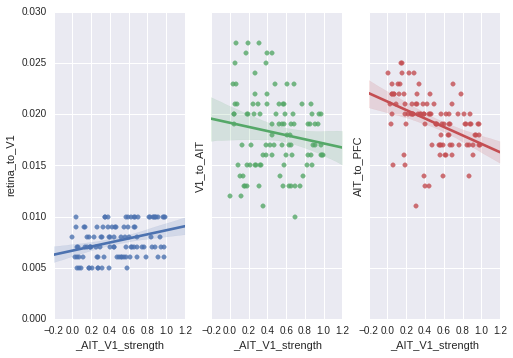

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_AIT_V1_strength'
sns.regplot(x, y = 'retina_to_V1', ax = ax1, data = df)
sns.regplot(x, y = 'V1_to_AIT', ax = ax2, data = df)
sns.regplot(x, y = 'AIT_to_PFC', ax = ax3, data = df)

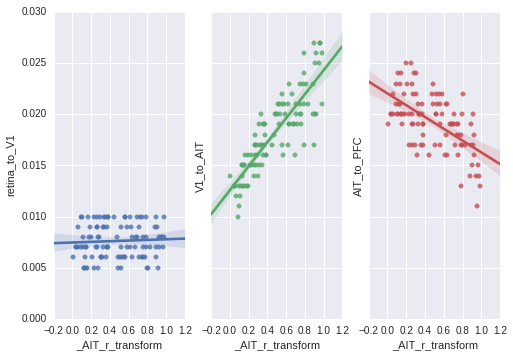

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_AIT_r_transform'
sns.regplot(x, y = 'retina_to_V1', ax = ax1, data = df)
sns.regplot(x, y = 'V1_to_AIT', ax = ax2, data = df)
sns.regplot(x, y = 'AIT_to_PFC', ax = ax3, data = df)

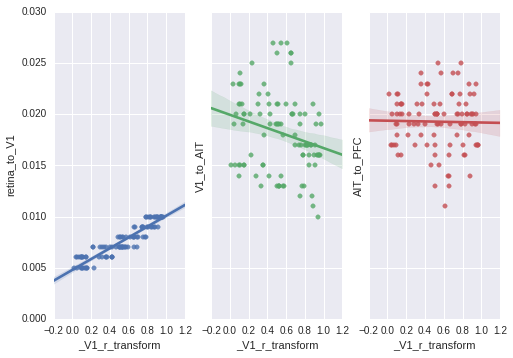

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_V1_r_transform'
sns.regplot(x, y = 'retina_to_V1', ax = ax1, data = df)
sns.regplot(x, y = 'V1_to_AIT', ax = ax2, data = df)
sns.regplot(x, y = 'AIT_to_PFC', ax = ax3, data = df)